In [4]:
import xarray as xr
from pyxpcm import pcm

In [3]:
print(pcm)

<class 'pyxpcm.models.pcm'>


In [6]:
import src.constants as cst

platform linux


In [18]:
salt = xr.open_dataset(cst.SALT_FILE)
print(salt)

<xarray.Dataset>
Dimensions:  (XC: 2160, YC: 588, Z: 52, time: 60)
Coordinates:
    iter     (time) int64 ...
  * time     (time) datetime64[ns] 2008-01-31T10:24:00 ... 2012-12-31
  * XC       (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.4 359.6 359.8 359.9
  * YC       (YC) float32 -77.98 -77.95 -77.91 -77.88 ... -30.02 -29.87 -29.72
  * Z        (Z) float32 -2.1 -6.7 -12.15 -18.55 ... -5e+03 -5.4e+03 -5.8e+03
    Depth    (YC, XC) float32 ...
    rA       (YC, XC) float32 ...
    drF      (Z) float32 ...
    hFacC    (Z, YC, XC) float32 ...
Data variables:
    SALT     (time, Z, YC, XC) float32 ...


In [12]:
theta = xr.open_dataset(cst.THETA_FILE)
print(theta)

<xarray.Dataset>
Dimensions:  (XC: 2160, YC: 588, Z: 52, time: 60)
Coordinates:
    iter     (time) int64 ...
  * time     (time) datetime64[ns] 2008-01-31T10:24:00 ... 2012-12-31
  * XC       (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.4 359.6 359.8 359.9
  * YC       (YC) float32 -77.98 -77.95 -77.91 -77.88 ... -30.02 -29.87 -29.72
  * Z        (Z) float32 -2.1 -6.7 -12.15 -18.55 ... -5e+03 -5.4e+03 -5.8e+03
    Depth    (YC, XC) float32 ...
    rA       (YC, XC) float32 ...
    drF      (Z) float32 ...
    hFacC    (Z, YC, XC) float32 ...
Data variables:
    THETA    (time, Z, YC, XC) float32 ...


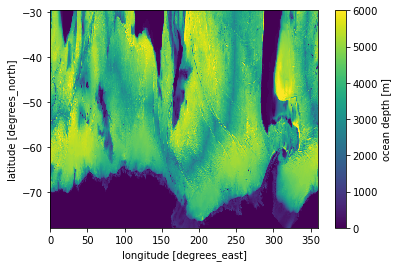

In [37]:
theta.coords['Depth'].plot()

In [39]:
theta_sel = theta.sel(Z=slice(-300, -2000)).where(theta.coords[cst.DEPTH_NAME] > 2000).drop(cst.USELESS_LIST)
salt_sel = salt.sel(Z=slice(-300, -2000)).where(salt.coords[cst.DEPTH_NAME] > 2000).drop(cst.USELESS_LIST)

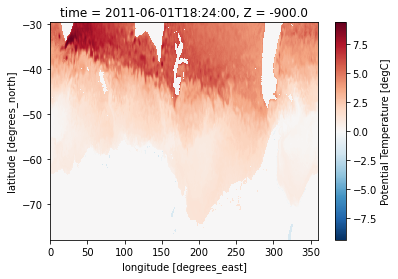

In [32]:
theta_sel.isel(time=cst.EXAMPLE_TIME_INDEX, Z=10).THETA.plot.imshow()

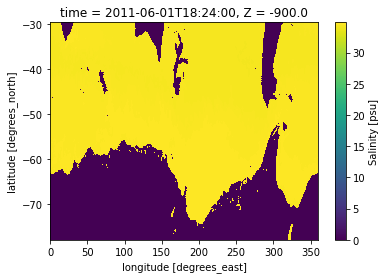

In [34]:
salt_sel.isel(time=cst.EXAMPLE_TIME_INDEX, Z=10).SALT.plot.imshow()